# K-means Clustering: Danceability vs Energy 

**Importing Relevant Libraries**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Data**

In [2]:
spotify_df = pd.read_csv("Spotify.csv")

**Assessing Data for determination of number of clusters**

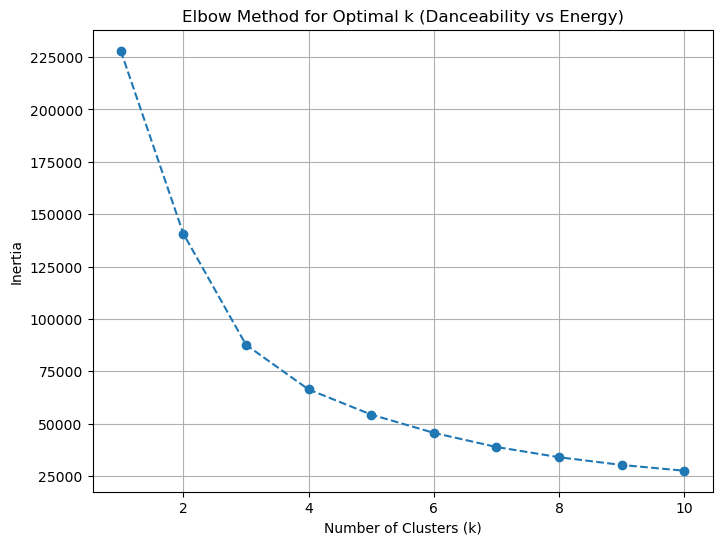

In [3]:
# 1. Prepare Data for 'danceability' and 'energy'

X = spotify_df[['danceability', 'energy']]

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Elbow Method
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4. Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Danceability vs Energy)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


**Applying K-means Clustering (danceability vs energy)**

Number of records in each cluster:
| cluster   | count   |
|:----------|:--------|
| 1         | 50587   |
| 0         | 35943   |
| 2         | 27470   |

Percentage of records in each cluster:
| cluster   | count   |
|:----------|:--------|
| 1         | 44.3746 |
| 0         | 31.5289 |
| 2         | 24.0965 |


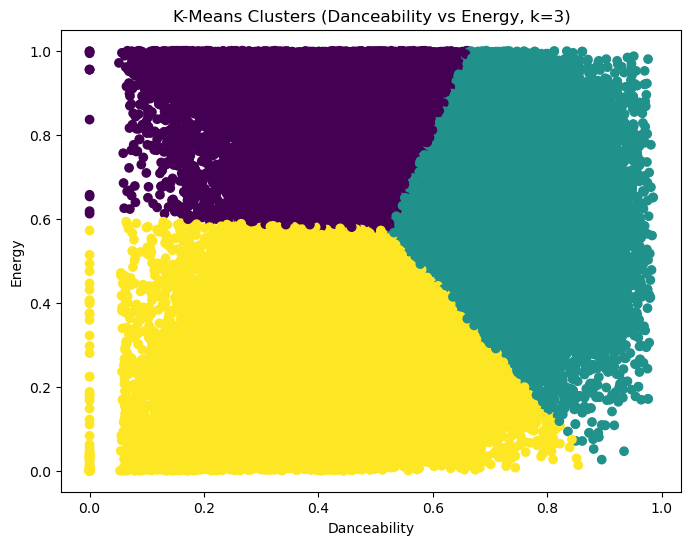

In [4]:
# 5. Apply K-Means clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = spotify_df.copy() # Create a copy to hold cluster labels
cluster_labels['cluster'] = kmeans.labels_

# 6. Get record counts and percentages
cluster_counts = cluster_labels['cluster'].value_counts()
cluster_percentages = (cluster_counts / len(cluster_labels)) * 100

# 7. Print the results
print(f"Number of records in each cluster:\n{cluster_counts.to_markdown(numalign='left', stralign='left')}")
print(f"\nPercentage of records in each cluster:\n{cluster_percentages.to_markdown(numalign='left', stralign='left')}")

# 8. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x=cluster_labels['danceability'], y=cluster_labels['energy'], c=cluster_labels['cluster'], cmap='viridis')
plt.title('K-Means Clusters (Danceability vs Energy, k=3)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()